In [83]:
from prac_code.tables import start
start()

In [15]:
import pandas as pd
tab1 = pd.read_csv("tables/tab1.tab", sep="\t")
tab2 = pd.read_csv("tables/tab2.tab", sep="\t")
tab3 = pd.read_csv("tables/tab3.tab", sep="\t")
tab4 = pd.read_csv("tables/tab4.tab", sep="\t")

In [16]:
tab1

,f0,Vmax,f_m07,f_p07
0,7194,0.027,6881,7512
1,7182,0.027,6906,7491
2,7187,0.027,6900,7506


In [17]:
tab1["delta_f"] = tab1["f_p07"] - tab1["f_m07"]

In [18]:
tab1

,f0,Vmax,f_m07,f_p07,delta_f
0,7194,0.027,6881,7512,631
1,7182,0.027,6906,7491,585
2,7187,0.027,6900,7506,606


In [19]:
from prac_code.value import Value
tab1 = tab1.append([{
    "f0": Value(syst=0.0, values=tab1["f0"]),
    "Vmax": Value(syst=0.0005, values=tab1["Vmax"]),
    "f_m07": Value(syst=0.0, values=tab1["f_m07"]),
    "f_p07": Value(syst=0.0, values=tab1["f_p07"]),
    "delta_f": Value(syst=0.0, values=tab1["f_p07"]) - Value(syst=0.0, values=tab1["f_m07"])
}], ignore_index=True)


In [24]:
import numpy as np
Q = tab1["f0"][3] / tab1["delta_f"][3]
print(Q)

11.8 ± 0.3


In [26]:
C0 = 0.47e-06
from math import pi
f0 = tab1["f0"][3]
L = (1 / (f0 * 2 * pi)) ** 2 / C0
print(L)

0.0010432 ± 0.0000017


In [28]:
R = 1 / Q * (L / C0) ** 0.5
print(R)

3.98 ± 0.11


In [29]:
from pandas.core.series import Series
tab2["D"] = tab2["D"].apply(Value)
tab2["f01"] = Series([Value(syst=0.0, values=[tab2["f011"][i], tab2["f012"][i], tab2["f013"][i]]) for i in range(7)])
tab2["f02"] = Series([Value(syst=0.0, values=[tab2["f021"][i], tab2["f022"][i], tab2["f023"][i]]) for i in range(7)])

In [30]:
tab2

,D,f011,f012,f013,f021,f022,f023,f01,f02
0,0 ± 0,6366,6364,6364,8342,8334,8319,6364.7 ± 1.2,8332 ± 12
1,5 ± 0,6500,6496,6498,8062,8064,8064,6498 ± 2,8063.3 ± 1.2
2,10 ± 0,6643,6640,6646,7809,7811,7812,6643 ± 3,7810.7 ± 1.5
3,15 ± 0,6757,6742,6764,7662,7664,7679,6754 ± 11,7668 ± 9
4,20 ± 0,6840,6832,6832,7495,7488,7503,6835 ± 5,7495 ± 8
5,25 ± 0,6986,6928,6934,7232,7238,7283,6.95e+3 ± 3e+1,7.25e+3 ± 3e+1
6,30 ± 0,7056,7069,7045,7056,7069,7045,7057 ± 12,7057 ± 12


In [31]:
tab2["f0"] = 2**0.5 * tab2["f01"] * tab2["f02"] / (tab2["f01"]**2.0 + tab2["f02"]**2.0)**0.5

In [32]:
tab2

,D,f011,f012,f013,f021,f022,f023,f01,f02,f0
0,0 ± 0,6366,6364,6364,8342,8334,8319,6364.7 ± 1.2,8332 ± 12,7153 ± 4
1,5 ± 0,6500,6496,6498,8062,8064,8064,6498 ± 2,8063.3 ± 1.2,7155.3 ± 1.4
2,10 ± 0,6643,6640,6646,7809,7811,7812,6643 ± 3,7810.7 ± 1.5,7156.4 ± 2.0
3,15 ± 0,6757,6742,6764,7662,7664,7679,6754 ± 11,7668 ± 9,7168 ± 8
4,20 ± 0,6840,6832,6832,7495,7488,7503,6835 ± 5,7495 ± 8,7142 ± 4
5,25 ± 0,6986,6928,6934,7232,7238,7283,6.95e+3 ± 3e+1,7.25e+3 ± 3e+1,7.10e+3 ± 2e+1
6,30 ± 0,7056,7069,7045,7056,7069,7045,7057 ± 12,7057 ± 12,7057 ± 8


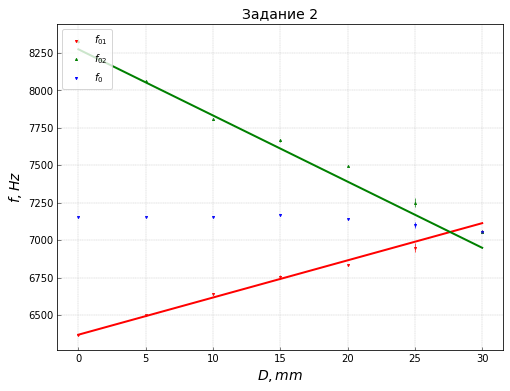

[FitParameters(legend='$f_{01}$', a=24.8380011153251, sigma_a=0.9994433786424354, b=6368.545079003989, sigma_b=6.154694091277709, r=0.9969393724780611),
 FitParameters(legend='$f_{02}$', a=-44.19629160237543, sigma_a=2.879276606689889, b=8275.056032979308, sigma_b=23.357599340531188, r=-0.9968265028197703)]

In [33]:
from prac_code.plotter import Plotter
Plotter(draw_legend=True).set_name("task2").set_title("Задание 2").set_y_name("$f, Hz$").set_x_name(
        "$D, mm$"). \
        add_line(Plotter.get_new_line(y_value=tab2['f01'], x_value=tab2["D"],
                                      draw_error=True, legend='$f_{01}$', fit=True, color='red', marker="v")).\
        add_line(Plotter.get_new_line(y_value=tab2['f02'], x_value=tab2["D"],
                                      draw_error=True, legend='$f_{02}$', fit=True, color='green', marker="^")).\
        add_line(Plotter.get_new_line(y_value=tab2['f0'], x_value=tab2["D"],
                                      draw_error=True, legend='$f_{0}$', fit=False, color='blue', marker="v")).\
        plot(show=True, save=True)

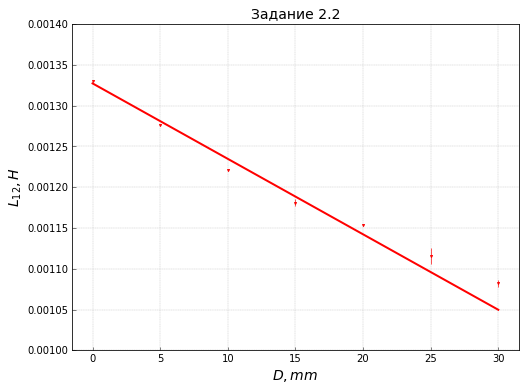

[FitParameters(legend='$f_{01}$', a=-9.25487636388719e-06, sigma_a=5.26640434383432e-07, b=0.0013273436799000162, sigma_b=3.7709581548371896e-06, r=-0.9928289424824166)]

In [59]:
from math import pi
# w0 = 1 / (L * C0) ** 0.5
# w1 = tab2["f01"] / (2 * pi)
L12 = 1 / (4 * pi**2 * tab2["f01"] ** 2 * C0)

Plotter(draw_legend=False).set_name("task2_2").set_title("Задание 2.2").set_y_name("$L_{12}, H$").set_x_name(
        "$D, mm$"). \
        add_line(Plotter.get_new_line(y_value=L12, x_value=tab2["D"],
                                      draw_error=True, legend='$f_{01}$', fit=True, color='red', marker="v")).\
        plot(show=True, save=True, ylim=(0.001, 0.0014))

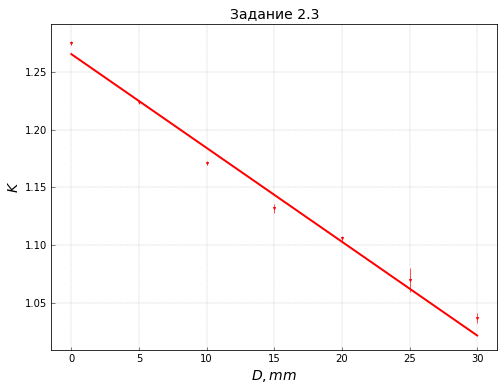

[FitParameters(legend='$f_{01}$', a=-0.008107805849488114, sigma_a=0.00046667794280518926, b=1.2652299176843709, sigma_b=0.006314735711295389, r=-0.9929992923301862)]

In [60]:
K = L12 / L

Plotter(draw_legend=False).set_name("task2_3").set_title("Задание 2.3").set_y_name("$K$").set_x_name(
        "$D, mm$"). \
        add_line(Plotter.get_new_line(y_value=K, x_value=tab2["D"],
                                      draw_error=True, legend='$f_{01}$', fit=True, color='red', marker="v")).\
        plot(show=True, save=True)

In [49]:
tab3["phi"] = tab3["phi"].apply(Value) + Value(values=[0.0], syst=1.0)
tab3["Vmax"] = tab3["Vmax"].apply(Value) + Value(values=[0.0], syst=0.0005)
tab3

,phi,Vmax
0,0.0 ± 1.0,0.0150 ± 0.0005
1,10.0 ± 1.0,0.0150 ± 0.0005
2,20.0 ± 1.0,0.0140 ± 0.0005
3,30.0 ± 1.0,0.0140 ± 0.0005
4,40.0 ± 1.0,0.0130 ± 0.0005
5,50.0 ± 1.0,0.0120 ± 0.0005
6,60.0 ± 1.0,0.0090 ± 0.0005
7,70.0 ± 1.0,0.0060 ± 0.0005
8,80.0 ± 1.0,0.0060 ± 0.0005
9,90.0 ± 1.0,0.0045 ± 0.0005


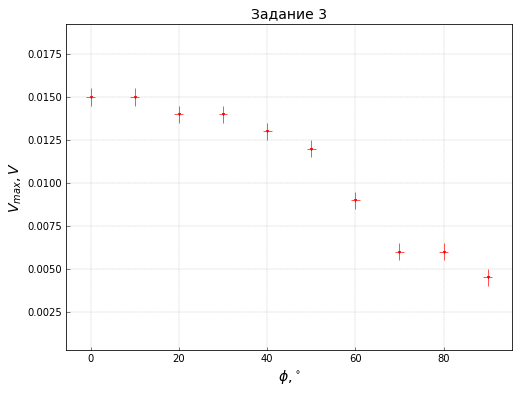

[]

In [50]:
Plotter(draw_legend=False).set_name("task3").set_title("Задание 3").set_y_name("$V_{max}, V$").set_x_name(
        "$\phi, ^{\circ}$"). \
        add_line(Plotter.get_new_line(y_value=tab3['Vmax'], x_value=tab3["phi"],
                                      draw_error=True, legend='$f_{01}$', fit=False, color='red', marker="v")).\
        plot(show=True, save=True)

In [52]:
tab4["Csv"] = tab4["C"].apply(Value) + Value(values=[0.0], syst=0.005)
tab4["f01"] = Series([Value(syst=0.0, values=[tab4["f011"][i], tab4["f012"][i], tab4["f013"][i]]) for i in range(5)])
tab4["f02"] = Series([Value(syst=0.0, values=[tab4["f021"][i], tab4["f022"][i], tab4["f023"][i]]) for i in range(5)])
tab4

,C,f011,f012,f013,f021,f022,f023,Csv,f01,f02
0,2.04,7159,7146,7138,8584,8566,8565,2.040 ± 0.005,7148 ± 11,8572 ± 11
1,1.40,7123,7117,7123,9099,9110,9102,1.400 ± 0.005,7121 ± 3,9104 ± 6
2,0.95,7089,7106,7104,9947,9959,9975,0.950 ± 0.005,7100 ± 9,9960 ± 14
3,0.31,7065,7083,7073,14345,14345,14417,0.310 ± 0.005,7074 ± 9,1.437e+4 ± 4e+1
4,0.22,7093,7063,7071,16047,16009,16032,0.220 ± 0.005,7076 ± 16,16029 ± 19


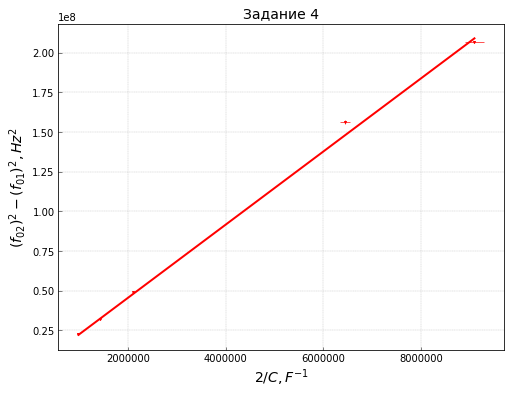

[FitParameters(legend='$f_{01}$', a=23.014326195957636, sigma_a=0.4088077818275015, b=-484327.41186848615, sigma_b=777898.6534864011, r=0.9988363178247299)]

In [56]:
Plotter(draw_legend=False).set_name("task4").set_title("Задание 4").set_y_name("$(f_{02})^2 - (f_{01})^2, Hz^2$").set_x_name(
        "$2 / C, F^{-1}$"). \
        add_line(Plotter.get_new_line(y_value=tab4['f02']**2 - tab4["f01"]**2, x_value=2 * (tab4["Csv"] * 10**-6)**-1,
                                      draw_error=True, legend='$f_{01}$', fit=True, color='red', marker="v")).\
        plot(show=True, save=True)

In [64]:
K = C0 / (C0 + tab4["Csv"] * 1.e-06)

/home/lev/PycharmProjects/PracLib/venv/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


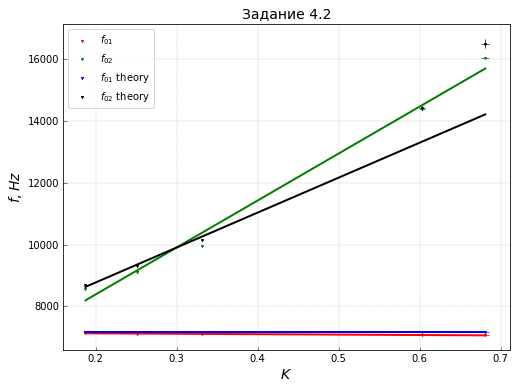

[FitParameters(legend='$f_{01}$', a=-134.73960882067894, sigma_a=27.45958556853583, b=7155.403145594557, sigma_b=8.731076831446899, r=-0.9317428529565972),
 FitParameters(legend='$f_{02}$', a=15184.209125223762, sigma_a=1161.0283075338148, b=5353.0977124183555, sigma_b=352.90494576105334, r=0.995053771803228),
 FitParameters(legend='$f_{01}$ theory', a=3.685092741448571e-05, sigma_a=9.33918148305067e-06, b=7187.999982302191, sigma_b=4.942746917242325e-06, r=nan),
 FitParameters(legend='$f_{02}$ theory', a=11299.28707759741, sigma_a=1327.5176621526005, b=6515.835638843885, sigma_b=315.08951135160453, r=0.9928196558559399)]

In [68]:
f01t = K / K * 1 / (2 * pi * (L * C0) ** 0.5)
f02t = ((K + 1) / (-K + 1)) ** 0.5 * f01t

Plotter(draw_legend=True).set_name("task4_2").set_title("Задание 4.2").set_y_name("$f, Hz$").set_x_name(
        "$K$"). \
        add_line(Plotter.get_new_line(y_value=tab4['f01'], x_value=K,
                                      draw_error=True, legend='$f_{01}$', fit=True, color='red', marker="v")).\
        add_line(Plotter.get_new_line(y_value=tab4['f02'], x_value=K,
                                      draw_error=True, legend='$f_{02}$', fit=True, color='green', marker="v")).\
        add_line(Plotter.get_new_line(y_value=f01t, x_value=K,
                                      draw_error=True, legend='$f_{01}$ theory', fit=True, color='blue', marker="v")).\
        add_line(Plotter.get_new_line(y_value=f02t, x_value=K,
                                      draw_error=True, legend='$f_{02}$ theory', fit=True, color='black', marker="v")).\
        plot(show=True, save=True)